Back to the main [Index](../index.ipynb)

The `AbiPy` structure inherits form `pymatgen` structure 
and therefore one has access to all the methods and tools already available in `pymatgen`.
In this notebook, we mainly focus on the extensions added by `AbiPy`. 

In [2]:
from __future__ import division, print_function, unicode_literals

# Import abipy modules
from abipy import abilab
from abipy.abilab import Structure
import abipy.data as abidata

# Useful tools we'll need later on.
from pprint import pprint
import numpy as np

# This line configures matplotlib to show figures embedded in the notebook, 
# instead of poping up a new window. 
%matplotlib notebook

## Reading a structure from file

You can read a crystalline structure from different file formats: 

   * CIF
   * POSCAR/CONTCAR
   * CHGCAR 
   * LOCPOT,
   * vasprun.xml
   * CSSR 
   * ABINIT Netcdf files 
   * pymatgen's JSON serialized structures

Note, in particular, that one can initialize the structure from any ABINIT Netcdf file 
(`GSR`, `WFK` etc).

In [3]:
# Initialize the structure from one of the CIF files shipped with abipy.
structure = Structure.from_file(abidata.cif_file("si.cif"))
print(structure)

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25


In [4]:
# Read the structure from a netcdf file
structure = Structure.from_file(abidata.ref_file("si_nscf_GSR.nc"))

# Use to_abivars to get the list of Abinit variables.
pprint(structure.to_abivars())

{'acell': [1.0, 1.0, 1.0],
 'natom': 2,
 'ntypat': 1,
 'rprim': array([[ 6.32850055,  0.        ,  3.6537615 ],
       [ 2.10950018,  5.96656754,  3.6537615 ],
       [ 0.        ,  0.        ,  7.30752299]]),
 'typat': array([1, 1]),
 'xred': array([[ 0.  ,  0.  ,  0.  ],
       [ 0.25,  0.25,  0.25]]),
 'znucl': [14]}


To get a structure from the materials project database 
(https://www.materialsproject.org/)

In [5]:
# You can pass the api_key or set the env variable MAPI_KEY in your bashrc.
print(Structure.from_material_id("mp-149", api_key=None))

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP        a      b      c    coordination_no  forces
---  ----  -----  -----  -----  -----------------  ---------------
  0  Si    0.875  0.875  0.875                  5  [0.0, 0.0, 0.0]
  1  Si    0.125  0.125  0.125                  5  [0.0, 0.0, 0.0]


## Converting to other formats

Use structure.convert(format) to get the string representation in the new format.

In [6]:
for format in ["cif", "POSCAR"]:
    print((" Abinit --> %s " % format).center(80, "*"))
    s = structure.convert(format=format)
    print(s)

******************************** Abinit --> cif ********************************
# generated using pymatgen
data_Si
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.86697464
_cell_length_b   3.86697464
_cell_length_c   3.86697464
_cell_angle_alpha   60.00000000
_cell_angle_beta   60.00000000
_cell_angle_gamma   60.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Si
_chemical_formula_sum   Si2
_cell_volume   40.8882922759
_cell_formula_units_Z   2
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Si  Si1  1  0.000000  0.000000  0.000000  1
  Si  Si2  1  0.250000  0.250000  0.250000  1

****************************** Abinit --> POSCAR *******************************
Si2
1.0
3.348898 0.000000 1.933487
1.116299 3.157372 1.933487
0.000000 0.000000 3.866975
Si
2
direct


See also `abistruct.py` for a handy command line interface.

In [7]:
!abistruct.py --help

usage: abistruct.py [-h] [-V]
                    {spglib,convert,abisanitize,conventional,ipython,kpath,bz,kmesh,visualize,pmgdata,animate}
                    ...

optional arguments:
  -h, --help            show this help message and exit
  -V, --version         show program's version number and exit

subcommands:
  Valid subcommands, use command --help for help

  {spglib,convert,abisanitize,conventional,ipython,kpath,bz,kmesh,visualize,pmgdata,animate}
                        sub-command help
    spglib              Analyze structure with spglib.
    convert             Convert structure to the specified format.
    abisanitize         Sanitize structure with abi_sanitize, compare
                        structures and save result to file.
    conventional        Gives a structure with a conventional cell according
                        to certain standards. The standards are defined in
                        doi:10.1016/j.commatsci.2010.05.010
    ipython             Open IPyt

## Getting information on the structure

In [8]:
print(structure.reciprocal_lattice)

1.876195 -0.663335 0.000000
0.000000 1.990005 0.000000
-0.938097 -0.663335 1.624832


In [9]:
# List of high-symmetry k-points.
print(structure.hsym_kpoints)

0) [0.000, 0.000, 0.000], name=$\Gamma$, weight=0.000
1) [0.500, 0.000, 0.500], name=X, weight=0.000
2) [0.500, 0.250, 0.750], name=W, weight=0.000
3) [0.375, 0.375, 0.750], name=K, weight=0.000
4) [0.000, 0.000, 0.000], name=$\Gamma$, weight=0.000
5) [0.500, 0.500, 0.500], name=L, weight=0.000
6) [0.625, 0.250, 0.625], name=U, weight=0.000
7) [0.500, 0.250, 0.750], name=W, weight=0.000
8) [0.500, 0.500, 0.500], name=L, weight=0.000
9) [0.375, 0.375, 0.750], name=K, weight=0.000
10) [0.625, 0.250, 0.625], name=U, weight=0.000
11) [0.500, 0.000, 0.500], name=X, weight=0.000


The method `calc_ksampling` allows one to get an efficient sampling of the Brillouin zone 
by just specifying the number of divisions to be used for the smallest lattice vector of the reciprocal lattice.

In [10]:
pprint(structure.calc_ksampling(nksmall=10))

{'ngkpt': array([10, 10, 10]),
 'shiftk': array([[ 0.5,  0.5,  0.5],
       [ 0.5,  0. ,  0. ],
       [ 0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0.5]])}


To get a possible high symmetry $k$-path in reduced coordinates:

In [11]:
structure.calc_kptbounds()

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.5  ,  0.   ,  0.5  ],
       [ 0.5  ,  0.25 ,  0.75 ],
       [ 0.375,  0.375,  0.75 ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.5  ,  0.5  ,  0.5  ],
       [ 0.625,  0.25 ,  0.625],
       [ 0.5  ,  0.25 ,  0.75 ],
       [ 0.5  ,  0.5  ,  0.5  ],
       [ 0.375,  0.375,  0.75 ],
       [ 0.625,  0.25 ,  0.625],
       [ 0.5  ,  0.   ,  0.5  ]])

To visualize the Brillouin zone with matplotlib:

<IPython.core.display.Javascript object>


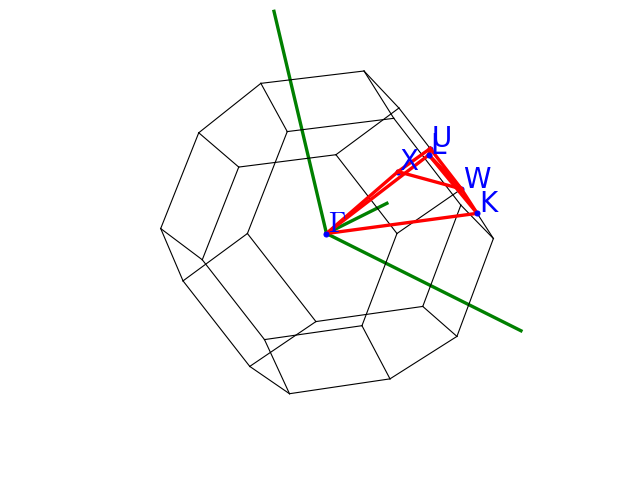

In [12]:
fig = structure.show_bz()

To get he number of valence electrons for a given set of pseudopotentials: 

In [13]:
structure.num_valence_electrons(pseudos=abidata.pseudos("14si.pspnc"))

8.0

## How to modify structures

Once you have a `Structure` object, you can perform several operations on it. For example, you can build a supercell or increase the volume of the unit cell. Python will simplify you work and, as a side effect, you will get a new object that can be immediately converted into the ABINIT format. In order to modify a structure, you have to instantiate a `StructureModifier` object that will allow you to perform several types of operations with a user-friendly interface

In [14]:
modifier = abilab.StructureModifier(structure)

To create a supercell, use:

In [15]:
new_structure = modifier.make_supercell(scaling_matrix=[1, 2, 3])
print(new_structure)

Full Formula (Si12)
Reduced Formula: Si
abc   :   3.866975   7.733949  11.600924
angles:  60.000000  60.000000  60.000000
Sites (12)
  #  SP       a      b         c
---  ----  ----  -----  --------
  0  Si    0     0      0
  1  Si    0     0      0.333333
  2  Si    0     0      0.666667
  3  Si    0     0.5    0
  4  Si    0     0.5    0.333333
  5  Si    0     0.5    0.666667
  6  Si    0.25  0.125  0.083333
  7  Si    0.25  0.125  0.416667
  8  Si    0.25  0.125  0.75
  9  Si    0.25  0.625  0.083333
 10  Si    0.25  0.625  0.416667
 11  Si    0.25  0.625  0.75


To perform a homogeneous dilatation of the lattice, use:

In [16]:
# From 98% to 102% of the initial volume (104 is not a typo!)
new_structures = modifier.scale_lattice(vol_ratios=np.arange(98, 104, 2) / 100.)
for s in new_structures: 
    print(s, "\nvolume", s.lattice.volume, "\n")

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.841021   3.841021   3.841021
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25 
volume 40.0705264304 

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25 
volume 40.8882922759 

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.892584   3.892584   3.892584
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25 
volume 41.7060581215 

